# Detection of Genetic Predisposition for Breast Cancer Among Women Using SNPs

The project aims to identify a correlation between SNPs in the genes of patients suffering from a form of breast cancer, enabling predictions regarding breast cancer predisposition.

The dataset used contains information about women who suffer from a form of breast cancer and women who do not present this pathology. The genes, along with the SNPs, represent genetic structures relevant to this pathology.

The dataset is located [here.](https://springernature.figshare.com/articles/dataset/Dataset_containing_genotype_data_for_single_nucleotide_polymorphism_markers_in_sporadic_breast_cancer_related_genes_in_a_Sri_Lankan_case-control_cohort_of_postmenopausal_women/7159514)

## 1) Loading the Dataset

As observed, the first row of the dataset contains the genes, while the second row lists the SNPs for each gene.

From the third row to the end, there are formations of two characters each, representing combinations of nitrogenous bases. In this regard, reversed combinations, such as CT and TC, will be considered the same combination.

The column labeled 'Cancer' contains binary values indicating whether the individual has a form of breast cancer or not, as well as whether they are predisposed to breast cancer or not.

In [ ]:
import pandas as pd
import numpy as np

# load dataset
df = pd.read_excel("Genes for breast cancer predisposition.xlsx")
print(df)

           FGFR2        PHB      GATA3       AKT1       NQO2       BRCA2  \
0      rs1047111  rs1049620  rs1058240  rs1130214  rs1143684  rs11571836   
1             CT         TC         AA         CC         TT          AA   
2             TT         TC         AA         CC         TT          AA   
3             TT         TC         GA         CA         CC          AA   
4             TT         TC         AA         CC         TT          AA   
...          ...        ...        ...        ...        ...         ...   
13096         TT         CC         GA         AA         CT          AA   
13097         TT         CC         AA         CC         CT          AA   
13098         TT         CC         AA         CC         TT          AG   
13099         TT         TC         AA         CC         TT          AA   
13100         TT         CC         AA         CA         CT          AG   

             LSP1    FGFR1     CDH1      NBN  ...   KRAS      FOXA1   CCND1  \
0      r

## 2) Vom separa datele alipite SNP-urilor si le vom numeriza

Va trebui sa normalizam intr-o anumita forma datele din dataset-ul nostru, astfel gruparile de baze azotate vor fi numerizate in ordinea aparitiei acesora.

In [ ]:
# We separate the SNP characteristics from the decisive factor (1/0) that indicates predisposition to cancer.
data_features = df.iloc[0:700, :-1]  # for SNPs
data_target = df.iloc[1:700, -1]  # column for cancer label

# Sortam alelele in functie de aparitia lor

# Alleles with inverted elements, such as AT and TA, are represented by the same value.
def normalize_snp(value):
    if isinstance(value, str) and len(value) == 2:
        return ''.join(sorted(value)) # We sort the alleles alphabetically to disregard the order of the nitrogenous bases.
    return np.nan  # Otherwise, the data is considered invalid.

# We apply the normalize_snp function to all the data in the dataset.
normalized_data = data_features.applymap(normalize_snp)

# We create a mapping based on the frequency of occurrence of the alleles and assign each one a numeric value.
unique_combinations = sorted(normalized_data.stack().unique())
combination_to_score = {comb: idx for idx, comb in enumerate(unique_combinations)}

# Mapping the normalized SNPs to scores.
scored_data = normalized_data.applymap(lambda x: combination_to_score.get(x, np.nan))

# We remove the first row because it contains only NaN values, as it initially held the names of the SNPs.
scored_data = scored_data.drop(index=0).reset_index(drop=True)

# Handling missing values.
scored_data = scored_data.apply(
    lambda col: col.fillna(col.mode()[0] if not col.mode().empty else 0)
)

data_target[0] = 1 if  data_target.sum()%2 == 0 else 0

# We convert the data in data_target to integers.
data_target = pd.to_numeric(data_target, errors="coerce").fillna(0).astype(int)

# Creating a new variable to store all the data from our dataset.
processed_data = scored_data.copy()
processed_data["Cancer"] = data_target

# Displaying the new data.
print(processed_data.head())

   FGFR2  PHB  GATA3  AKT1  NQO2  BRCA2  LSP1  FGFR1  CDH1  NBN  ...  KRAS  \
0    6.0  6.0    0.0   4.0   9.0    0.0   4.0    9.0   9.0  2.0  ...   4.0   
1    9.0  6.0    0.0   4.0   9.0    0.0   4.0    6.0   9.0  0.0  ...   1.0   
2    9.0  6.0    2.0   1.0   4.0    0.0   5.0    9.0   9.0  0.0  ...   4.0   
3    9.0  6.0    0.0   4.0   9.0    0.0   4.0    9.0   9.0  0.0  ...   1.0   
4    9.0  6.0    0.0   4.0   9.0    0.0   5.0    9.0   9.0  0.0  ...   4.0   

   FOXA1  CCND1  ABCC12  CDKN1B.2  BRCA1  LSP1.1  GATA3.2  NBN.2  Cancer  
0    6.0    4.0     0.0       0.0    2.0     2.0      0.0    2.0       1  
1    9.0    1.0     0.0       0.0    2.0     2.0      0.0    2.0       1  
2    6.0    1.0     2.0       0.0    0.0     7.0      0.0    0.0       1  
3    9.0    1.0     0.0       1.0    2.0     7.0      0.0    2.0       1  
4    6.0    0.0     2.0       1.0    7.0     7.0      2.0    7.0       1  

[5 rows x 58 columns]


<ipython-input-16-10918a13e953>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  normalized_data = data_features.applymap(normalize_snp)
<ipython-input-16-10918a13e953>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scored_data = normalized_data.applymap(lambda x: combination_to_score.get(x, np.nan))


# 3) Verificarea datelor

In [ ]:
# We check the data types.
print(f"Tipul de date pentru data_target: {data_target.dtypes}")
print(f"Tipul de date pentru scored_data: \n{scored_data.dtypes}", end='\n\n\n')

# We check the dimensions.
print(f"Dimensiuni scored_data: {scored_data.shape}")
print(f"Dimensiuni data_target: {data_target.shape}")

Tipul de date pentru data_target: int64
Tipul de date pentru scored_data: 
FGFR2       float64
PHB         float64
GATA3       float64
AKT1        float64
NQO2        float64
BRCA2       float64
LSP1        float64
FGFR1       float64
CDH1        float64
NBN         float64
BRCA2.1     float64
BRCA2.2     float64
NQO2.1      float64
NQO2.2      float64
RB1CC1      float64
CASP8       float64
BRCA2.3     float64
MLH1        float64
ATM         float64
NBN.1       float64
EP300       float64
CDKN1B      float64
NQO2.3      float64
PMS2        float64
GATA3.1     float64
TNFRSF14    float64
MYH9        float64
MYH9.1      float64
XRCC1       float64
XRCC1.1     float64
MDM2        float64
TP53        float64
CDKN2A      float64
ATM.1       float64
XRCC2       float64
XRCC2.1     float64
XRCC2.2     float64
CDKN1B.1    float64
APC         float64
FANCF       float64
SIPA1       float64
ERBB2       float64
ATM.2       float64
APC.1       float64
FANCC       float64
FANCC.1     float64
PHB.1

## 4) Reducerea dimensiunii datelor folosind PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# We initialize PCA (Principal Component Analysis).
pca1 = PCA(n_components=1)
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=10)
test = scored_data.apply(lambda x: x-x.mean())
not_reduced_data = scored_data
data_reduced_pca1 = pca1.fit_transform(scored_data)
data_reduced_pca2 = pca2.fit_transform(scored_data)
print(f"Date reduse la o dimnesiune:\n{data_reduced_pca1}")
print(f"Date reduse la doua dimnesiuni:\n{data_reduced_pca2}")
print(f"Date nereduse:\n{not_reduced_data}")

Date reduse la o dimnesiune:
[[-2.94011896e+00]
 [ 5.31515875e-02]
 [-9.05638097e-01]
 [-1.66136587e+00]
 [-2.74966021e+00]
 [-1.35308622e-01]
 [-3.98884431e+00]
 [-9.54579184e-01]
 [-3.38399961e+00]
 [ 1.95693487e+00]
 [-1.77731227e+00]
 [-3.21808407e+00]
 [-2.96690317e+00]
 [ 4.93549811e+00]
 [-4.62378006e+00]
 [-1.70253871e+00]
 [ 3.19230728e+00]
 [ 3.31722773e-01]
 [ 4.57601614e+00]
 [-1.11268969e+00]
 [-4.69920211e+00]
 [ 2.50407974e-01]
 [-3.82140545e+00]
 [-1.00336545e+00]
 [-2.06466206e-01]
 [-3.33947660e+00]
 [-2.12736415e+00]
 [ 4.09867252e+00]
 [-3.84607096e+00]
 [-3.41099587e+00]
 [-9.21823749e-01]
 [ 3.36236390e+00]
 [ 3.55964570e+00]
 [-1.50588394e+00]
 [ 4.91656185e+00]
 [-1.98127989e+00]
 [ 4.14863042e+00]
 [ 5.75460556e-01]
 [-1.10481588e-01]
 [-1.42795489e+00]
 [-7.46673088e-01]
 [-3.27019139e+00]
 [-2.15898810e+00]
 [ 2.13092469e+00]
 [ 5.11620839e+00]
 [ 5.11620839e+00]
 [-3.30044003e-01]
 [-4.96846413e-01]
 [ 5.18824307e+00]
 [ 5.16214078e+00]
 [ 2.83800592e+00]
 [

# 5) Normalizarea datelor cu MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import linalg as LA

scaler = MinMaxScaler()
scaler.fit(data_reduced_pca1)
data_reduced_pca1 = scaler.transform(data_reduced_pca1)

scaler.fit(data_reduced_pca2)
data_reduced_pca2 = scaler.transform(data_reduced_pca2)

scaler.fit(not_reduced_data)
not_reduced_data = scaler.transform(not_reduced_data)

scaler.fit(test)
test = scaler.transform(test)

print(len(data_reduced_pca1))
print(len(data_reduced_pca2))
print(len(not_reduced_data))
print(len(data_target[:-1]))

699
699
699
699


# 6) Vizualizarea datelor

Text(0.5, 0.92, 'Distributia indivizilor in functie de informatiile SNP-urilor si diagnostic pentru date reduse la doua dimensiuni')

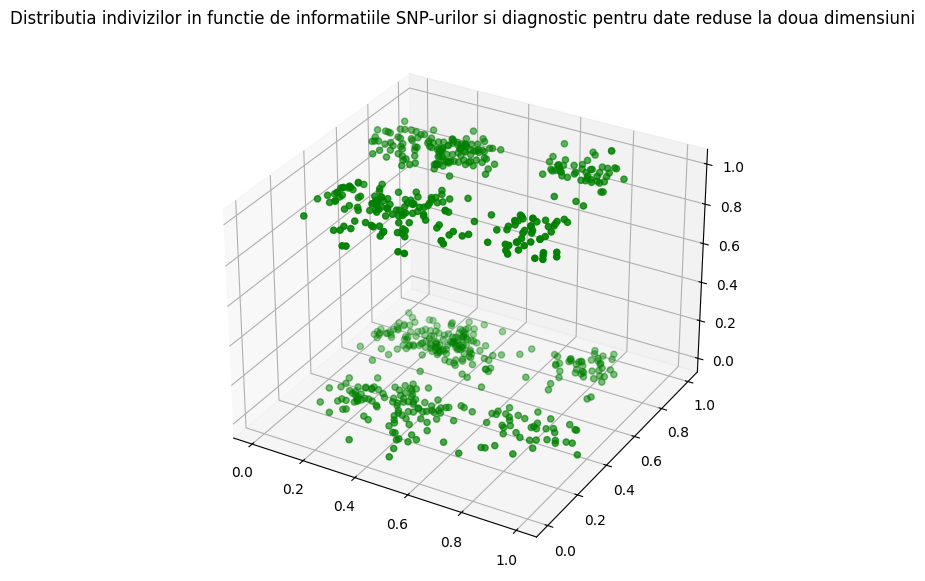

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_reduced_pca2[:,0], data_reduced_pca2[:,1], data_target[:-1], color = "green")
plt.title("The distribution of individuals based on SNP information and diagnosis for data reduced to two dimensions.")

Text(0.5, 0.92, 'Distributia indivizilor in functie de informatiile SNP-urilor si diagnostic pentru date reduse la o dimensiune')

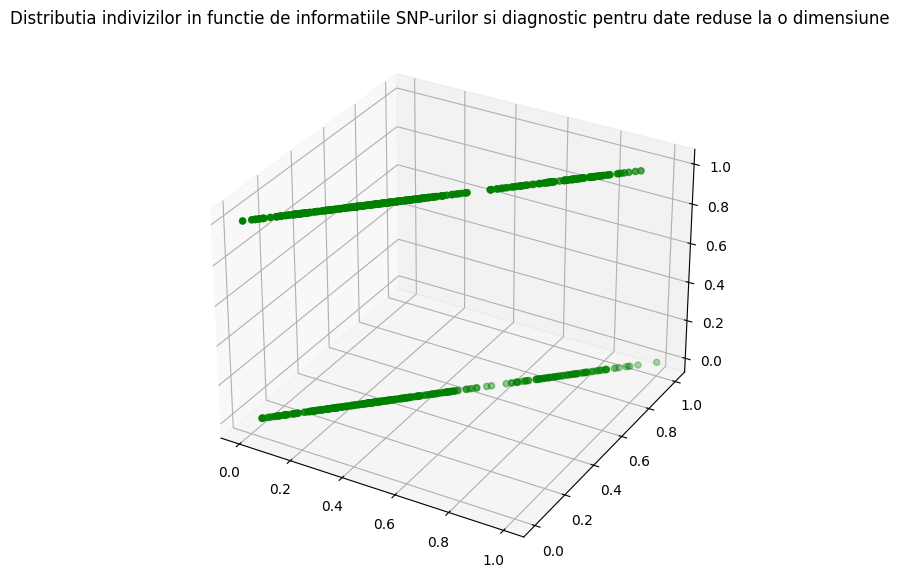

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_reduced_pca1, data_reduced_pca1, data_target[:-1], color = "green")
plt.title("The distribution of individuals based on SNP information and diagnosis for data reduced to one dimension.")

## 7) Declararile modelelor si antrenarile

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_reduced_pca1, data_target[:-1], test_size=0.2, random_state=1)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train1.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


y_pred = (model.predict(X_test1) > 0.5).astype(int)
print(classification_report(y_test1, y_pred))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4521 - loss: 0.6964 - val_accuracy: 0.4911 - val_loss: 0.6933
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5131 - loss: 0.6928 - val_accuracy: 0.4911 - val_loss: 0.6925
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4783 - loss: 0.6930 - val_accuracy: 0.4911 - val_loss: 0.6923
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5115 - loss: 0.6919 - val_accuracy: 0.4911 - val_loss: 0.6922
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4745 - loss: 0.6933 - val_accuracy: 0.4821 - val_loss: 0.6917
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4886 - loss: 0.6964 - val_accuracy: 0.5179 - val_loss: 0.6912
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5075 - loss: 0.6934 - val_accuracy: 0.5268 - val_loss: 0.6912
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5083 - loss: 0.6946 - val_accuracy: 0.5714 - val_loss: 0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train2, X_test2, y_train2, y_test2 = train_test_split(data_reduced_pca2, data_target[:-1], test_size=0.2, random_state=1)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train2.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


y_pred = (model.predict(X_test2) > 0.5).astype(int)
print(classification_report(y_test2, y_pred))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4824 - loss: 0.6966 - val_accuracy: 0.4911 - val_loss: 0.6925
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5692 - loss: 0.6898 - val_accuracy: 0.5089 - val_loss: 0.6916
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5642 - loss: 0.6886 - val_accuracy: 0.5357 - val_loss: 0.6914
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5132 - loss: 0.6863 - val_accuracy: 0.5089 - val_loss: 0.6911
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5473 - loss: 0.6877 - val_accuracy: 0.5268 - val_loss: 0.6910
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5444 - loss: 0.6887 - val_accuracy: 0.5089 - val_loss: 0.6912
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5743 - loss: 0.6860 - val_accuracy: 0.5268 - val_loss: 0.6917
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5481 - loss: 0.6873 - val_accuracy: 0.5268 - val_loss: 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train1, X_test1, y_train1, y_test1 = train_test_split(not_reduced_data, data_target[:-1], test_size=0.2, random_state=1)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train1.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

y_pred = (model.predict(X_test1) > 0.5).astype(int)
print(classification_report(y_test1, y_pred))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4740 - loss: 0.7177 - val_accuracy: 0.4911 - val_loss: 0.6932
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5543 - loss: 0.6863 - val_accuracy: 0.5446 - val_loss: 0.6889
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5158 - loss: 0.7041 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5335 - loss: 0.6847 - val_accuracy: 0.4911 - val_loss: 0.6935
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5185 - loss: 0.6837 - val_accuracy: 0.5089 - val_loss: 0.6919
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5401 - loss: 0.6888 - val_accuracy: 0.5625 - val_loss: 0.6898
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5663 - loss: 0.6808 - val_accuracy: 0.5089 - val_loss: 0.6931
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6354 - loss: 0.6612 - val_accuracy: 0.5089 - val_loss: 0.

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        73
           1       0.39      0.39      0.39        67

    accuracy                           0.42       140
   macro avg       0.42      0.42      0.42       140
weighted avg       0.42      0.42      0.42       140



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train1, X_test1, y_train1, y_test1 = train_test_split(test, data_target[:-1], test_size=0.2, random_state=1)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train1.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

y_pred = (model.predict(X_test1) > 0.5).astype(int)
print(classification_report(y_test1, y_pred))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5205 - loss: 0.7080 - val_accuracy: 0.5179 - val_loss: 0.6857
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4899 - loss: 0.7068 - val_accuracy: 0.5446 - val_loss: 0.6874
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5213 - loss: 0.7013 - val_accuracy: 0.5357 - val_loss: 0.6864
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6125 - loss: 0.6627 - val_accuracy: 0.5893 - val_loss: 0.6849
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5580 - loss: 0.6785 - val_accuracy: 0.5804 - val_loss: 0.6832
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5727 - loss: 0.6744 - val_accuracy: 0.5268 - val_loss: 0.6878
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5741 - loss: 0.6796 - val_accuracy: 0.5446 - val_loss: 0.6902
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6127 - loss: 0.6507 - val_accuracy: 0.5000 - val_loss: 0.